# SEN163A - Fundamentals of Data Analytics
# Assignment 1 - Data consistency
### Ir. Jacopo De Stefani - [J.deStefani@tudelft.nl](mailto:J.deStefani@tudelft.nl)
### Joao Pizani Flor, M.Sc. - [J.p.pizaniflor@tudelft.nl](mailto:J.p.pizaniflor@tudelft.nl)

## Group X
- Emmanuel M Boateng - '5617642'
- Joost Oortwijn - '4593472'
- Philip Busscher - ''Student ID3''
- Floris Kool - ''Student ID4''

## Evaluation criteria
The final grade for this assignment will be calculated based on the following criteria:

- $\textbf{Quality of the report}$ - 35\%
    - Reasonable formatting of the document and used citation appropriately
    - Use of proper English (typos, grammar)
    - Code script deliverable
    - Code quality
    - Problem Description
    - Dataset Description
    - Limitations
    - Conclusion/Action recommendations

- $\textbf{Identification of the problems in the database}$ - 65\%


# Introduction 

### Example text cell with formula

Bullet list:

- Item 1
- Item 2

Numbered list:

1. Item 1
2. Item 2


# 1. Dataset Description

First we will describe the data set. By doing so, we try to identify the inconsistencies in the data set and possible fraudulent activities. We will do so by doing some basic data description prints and plots of the data. 

In [1]:
### Read and load the database

import pandas as pd
import matplotlib as plt
import sqlite3 as sq3
import numpy as np

dbfile = 'transaction_data.db' # path to the file 

conn = sq3.connect(dbfile)  # Create a SQL connection to our SQLite database
curs = conn.cursor()

##Check the tables in the database
table_lst = [a for a in curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()]
print(table_lst) # here is you table list

##get the table info 
for row in curs.execute('PRAGMA table_info(transaction_data)'):    
    print(row)

##read the SQL data and print the first five lines
df = pd.read_sql_query("SELECT * FROM transaction_data", conn) 
##df.head()

##create a list of all columns 
col_names = []
for row in curs.execute('PRAGMA table_info(transaction_data)'):
    names = row[1]
    col_names.append(names)



[('transaction_data',)]
(0, 'id', 'integer', 0, None, 1)
(1, 'timestamp', 'integer', 1, None, 0)
(2, 'type', 'text', 1, None, 0)
(3, 'amount', 'text', 1, None, 0)
(4, 'nameOrig', 'text', 1, None, 0)
(5, 'oldbalanceOrig', 'text', 1, None, 0)
(6, 'newbalanceOrig', 'text', 1, None, 0)
(7, 'nameDest', 'text', 1, None, 0)
(8, 'oldbalanceDest', 'text', 1, None, 0)
(9, 'newbalanceDest', 'text', 1, None, 0)



DataFrame Shape : (7734834, 10)

Number of data points : 7734834

Number of data variables : 10
          amount  timestamp  newbalanceOrig  newbalanceDest
min         0.00          1   -9.244552e+07   -4.234680e+06
max  92445516.64        743    7.742894e+07    3.574408e+08

Mean amount transferred : 147953.14010523

No.of. origin accounts : 6353308

No.of. destination accounts : 2722364


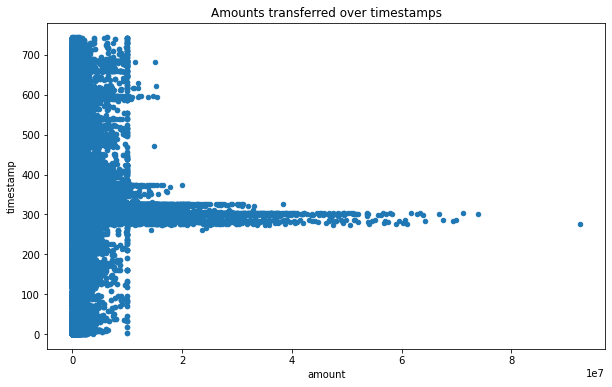

In [2]:
## Get the data description

##convert data types of columns from string to numeric
convert_list =["amount", 
               "oldbalanceOrig", 
               "newbalanceOrig", 
               "oldbalanceDest", 
               "newbalanceDest"]

## convert the str columns of convert_list to numeric
df[convert_list] = df[convert_list].apply(pd.to_numeric)


data_shape = df.shape
print('\nDataFrame Shape :', data_shape)
print('\nNumber of data points :', data_shape[0])
print('\nNumber of data variables :', data_shape[1])


df_MinMax = df[['amount','timestamp', 'newbalanceOrig', 'newbalanceDest']].agg(['min','max'])
print (df_MinMax)

chnk_sz = 7
data_chunks = np.array_split(df, chnk_sz)

df_meanAmount = df['amount'].mean()
print('\nMean amount transferred :', df_meanAmount)

##some info about the dataset (already done with sqlite 
##df.info(verbose=True, buf=None, max_cols=True, memory_usage=None, show_counts=True)

## Plotting some data. Not so informative. TBD: Perhaps filter and plot based on amounts
df.plot(x='amount', y='timestamp', kind='scatter',
        figsize=(10,6),
        title='Amounts transferred over timestamps')

orig_n = len(pd.unique(df['nameOrig']))
dest_n = len(pd.unique(df['nameDest']))


print("\nNo.of. origin accounts :", orig_n)
print("\nNo.of. destination accounts :", dest_n)

##df.plot(y=['amount'])

##TBD count timestamp with most # of transactions


### Discussion results data description

Noteable results: 

1. Especially when looking at the graph above, *Amounts transferred over timestamps*, it stands out that around time stamp 300 significantlly higher amounts of money is transferred. Therefore it is interesting to study this inconsitency more indepth in the inconsitency chapter 2 below. 
2. When looking at the maximal and mininimal amount transferred, it is interesting to see that there are amounts transferred with a value of 0.00. Also the max value of 92 milion transferred stands out due to it's size. These two values will be researched more in chapter 3. 
3. When looking at the minimum values of *newbalanceOrig* and *newbalanceDest*, it stands out that there accounts with large negative balances. This could suggest there is fraudulent activity and will be discussed in chapter 3. 

## 1.1 Value counts of origin and destination accounts

In [3]:
df['nameOrig'].value_counts()[:10]

C1286084959    20
C1727860160     4
C1345668381     4
C773245049      4
C220401108      4
C1276100527     4
C1832548028     4
C1760438154     4
C770528136      4
C2006144147     4
Name: nameOrig, dtype: int64

Text(0, 0.5, 'Account name')

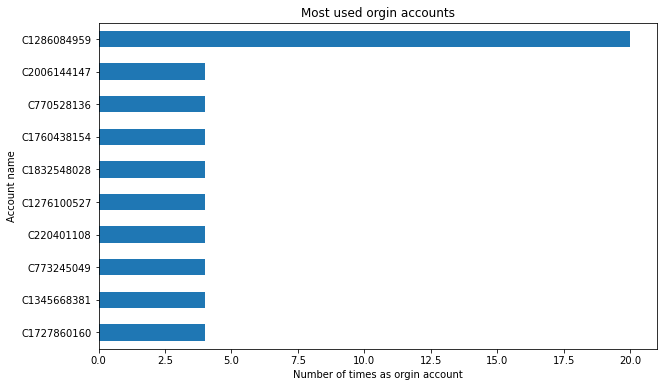

In [101]:
ax = df['nameOrig'].value_counts()[:10].sort_values().plot(kind = 'barh',figsize=(10,6),title='Most used orgin accounts')
ax.set_xlabel("Number of times as orgin account")
ax.set_ylabel("Account name")

In [5]:
df['nameDest'].value_counts()[:10]

C52983754      1372194
C1286084959        113
C985934102         109
C665576141         105
C2083562754        102
C1590550415        101
C248609774         101
C1789550256         99
C451111351          99
C1360767589         98
Name: nameDest, dtype: int64

Text(0, 0.5, 'Account name')

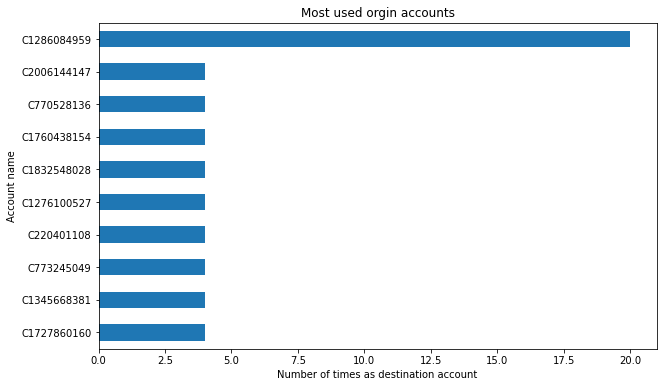

In [102]:
ax = df['nameOrig'].value_counts()[:10].sort_values().plot(kind = 'barh',figsize=(10,6),title='Most used orgin accounts')
ax.set_xlabel("Number of times as destination account")
ax.set_ylabel("Account name")

### Discussion value counts origin and destination accounts


When looking at the graph above, *most used destination accounts*, it can be seen that almost 1.4 milion transfers (of a total of 7 milion tranfers) is to the same destination account. This could indicate potential fraud and will be looked at more in depth in chapter 3.

# 2. Dataset Consistency

In [8]:
### Your code goes here

##splitting data based on timestamps
grouped = df.groupby(df.timestamp)

##get a specific timestamp group 
timestamp = 15
ts_1 = grouped.get_group(timestamp)
ts_1.head()

######
#splitting data into chunks (for future assignments)
#import numpy as np
#chnk_sz = 3
#np.array_split(df, chnk_sz)
######

##Check for duplicates in each time stamp
ts_idx = [] 
for ts in range(1,len(grouped)):
    g = grouped.get_group(ts)
    g_len = len(g)
    unq_rows = g.drop_duplicates()
    new_g_len = len(unq_rows)
    if new_g_len != g_len:
        ts_idx.append(ts)
        print("g_len: ", g_len, "unique rows: ", new_g_len)

if len(ts_idx) > 0:
    print("Duplicates exist in timestamps", *ts_idx)
else:
    print("Data is without duplicates", *ts_idx)


# create a function out of this later
#for items in range(len(grouped.get_group(2))):
#    group_obj = grouped.get_group(2)
#    if group_obj.iloc[items,3] == group_obj.iloc[items,6] :
#        print("id",group_obj.iloc[items,3] "same orig: ",group_obj.iloc[items,3], "and dest: ",group_obj.iloc[items,6])
#

Data is without duplicates


## 2.1 Inconsitencies in balances
When looking at the the first rows of the dataframe we found inconsistencies in the balances. Balances were not as expected when looking at the amounts transferred, the new origin balance values and the old balance values of the destination accounts. Therefore these inconsisentcies will be checked for the rest of the data.

In [71]:
# As the dataset contains a lot of data, we will start by only looking at a part of the complete dataset
g = grouped.get_group(19)

In [72]:
# Create new coluns with the expected new balances based on the ammounts transferred
pd.set_option('mode.chained_assignment', None)
g['New_balance_checkOrig'] = g['oldbalanceOrig']-g['amount']
g['New_balance_checkDest'] = g['oldbalanceDest']+g['amount']
g = g.reset_index()

index      id  timestamp      type     amount     nameOrig  \
0      535906  535907         19  TRANSFER   98858.40  C1958895751   
1      535907  535908         19  TRANSFER  221309.75  C1923061167   
2      535908  535909         19  TRANSFER    1154.55  C1223072336   
3      535909  535910         19  TRANSFER   49210.97   C304920993   
4      535910  535911         19  TRANSFER  229374.31   C470836390   
...       ...     ...        ...       ...        ...          ...   
62546  598452  598453         19  TRANSFER  152929.53  C2143849139   
62547  598453  598454         19  TRANSFER  140278.15   C593351836   
62548  598454  598455         19  TRANSFER  366027.57   C212001870   
62549  598455  598456         19  TRANSFER   10962.09  C1334924129   
62550  598456  598457         19  TRANSFER   12946.94   C956499468   

       oldbalanceOrig  newbalanceOrig     nameDest  oldbalanceDest  \
0              646.00      -98212.400  C1074822163     1149634.425   
1           100398.00     -120911.750    C26253754      595951.055   
2           321707.75      320553.200  M1972185551           0.000   
3           302402.00      253191.030   C986267724       80967.000   
4           146129.00      -83245.310   C231037736     3426242.645   
...               ...             ...          ...             ...   
62546      4834599.49     4681669.955  C1599238057      359156.985   
62547      4987529.02     4847250.870  C1255404581     1348292.605   
62548        30930.00     -335097.570  C1226766963      394336.290   
62549       337170.09      326208.000  M1958200626           0.000   
62550       326208.00      313261.060   M580392438           0.000   

       newbalanceDest      sumDest    diffOrig  New_balance_checkOrig  \
0         1248492.825  1248492.825   -98212.40              -98212.40   
1          817260.805   817260.805  -120911.75             -120911.75   
2            1154.550     1154.550   320553.20              320553.20   
3          130177.970   130177.970   253191.03              253191.03   
4         3655616.955  3655616.955   -83245.31              -83245.31   
...               ...          ...         ...                    ...   
62546      512086.510   512086.515  4681669.96             4681669.96   
62547     1488570.755  1488570.755  4847250.87             4847250.87   
62548      760363.860   760363.860  -335097.57             -335097.57   
62549       10962.090    10962.090   326208.00              326208.00   
62550       12946.940    12946.940   313261.06              313261.06   

       New_balance_checkDest  
0                1248492.825  
1                 817260.805  
2                   1154.550  
3                 130177.970  
4                3655616.955  
...                      ...  
62546             512086.515  
62547            1488570.755  
62548             760363.860  
62549              10962.090  
62550              12946.940  

[62551 rows x 15 columns]

In [73]:
#g_test = g['newbalanceOrig','newbalanceDest','New_balance_checkOrig','New_balance_checkDest']
pd.set_option('mode.chained_assignment', None)

for i in range(len(g)):
    if g.loc[i,'newbalanceOrig'] != g.loc[i,'New_balance_checkOrig']:
        newOrig = g.loc[i,'newbalanceOrig']
        checkOrig =  g.loc[i,'New_balance_checkOrig']
        differenceOrig = abs(checkOrig-newOrig)
        if differenceOrig > 0.001:
            g['difference orig'] = differenceOrig
            #print('Difference found in origin balance -> row : ', i, ' ,difference : ', differenceOrig)
            
for i in range(len(g)):        
    if g.loc[i,'newbalanceDest'] != g.loc[i,'New_balance_checkDest']:
        newDest =g.loc[i,'newbalanceDest']
        checkDest=g.loc[i,'New_balance_checkDest']
        differenceDest =  abs(newDest-checkDest)
        if differenceDest > 0.001:
            g['difference dest'] = differenceDest
          #  print('Difference found in destination balance -> row : ', i, ' ,difference : ', differenceDest)


In [74]:
# check if there differences above 0.01
(g['difference orig'] > 0.01).any()

False

In [75]:
# Number of differences in expected origin balances and actual orgin balances
(g['difference orig'] > 0).value_counts()

True    62551
Name: difference orig, dtype: int64

In [76]:
# check if there differences above 0.01
(g['difference dest'] > 0.01).any()

False

In [78]:
# Number of differences in expected destination balances and destinationbalances
(g['difference dest'] > 0).value_counts()

True    62551
Name: difference dest, dtype: int64

### Discussion value counts origin and destination accounts

It stands out that there are a lot of differences in expected balances and actual balance. But, the differences are always below 0.01. Due to the number of found inconsistencies and the low amount of differences we do not expect this to be fraudulent but a small error (possibly a round-off) in the data set. 

# 3. Fraud Identification

In [ ]:
### Your code goes here

##create functions to loop through groups
##Consider tweaking the absolute tolerance(atol) argument 
def inconsitentNewBalance(group_obj):
    for index, row in group_obj.iterrows():
        if np.isclose(row['sumDest'], row['newbalanceDest'], atol=1e-03):
            row['FraudType'] = "Legitimate"  ## Modify from this line here to create some statistics
        else:
            row['FraudType'] = "invalidDestBalance"
            

def inconsitentOldBalance(group_obj):
    for index, row in group_obj.iterrows():
        if np.isclose(row['diffOrig'], row['oldbalanceOrig'], atol=1e-03):
            row['FraudType'] = "Legitimate" ## Modify from this line here to add some statistics
        else:
            row['FraudType'] = "invalidOrigBalance"

#sum up the columns 
df['sumDest'] = df.loc[: , ['amount', 'oldbalanceDest']].sum(axis=1)
df['diffOrig'] = df['oldbalanceOrig'] - df['amount']
#df.head()

#grouped = df.groupby(df.timestamp)

##test fraudulent activity balance inconsitency
#g = grouped.get_group(301)
#for index, row in g.iterrows():
#    if np.isclose(row['sumDest'], row['newbalanceDest'], atol=1e-02):
#        row['FraudType'] = "Legitimate"  ## change from this line here to create some statistics
#    else:
#        row['FraudType'] = "invalidDestBalance"
#        print(row)

##group data by transfer amount (possibly add timestamp grouping as well)
#transferSum = df.groupby(df.amount)
#transferSum.groups
#for index, row in transferSum.iterrows():
#    ids = row["amount"]
#    print(ids)
    #row[ids.astype(int).isin(ids[ids.duplicated()])].sort("amount")

## 3.1 Analyzing transfers to C52983754 (highest value count of 1.4 million times)

In [44]:
# creating a df with only the transfers to C52983754
df_C52983754 = df[(df['nameDest'] == 'C52983754')]

In [46]:
print('the max amount transferred to C52983754 is : ' , df_C52983754["amount"].max())
print('the min amount transferred to C52983754 is : ' , df_C52983754["amount"].min())
print('the mean amount transferred to C52983754 is : ' , df_C52983754["amount"].mean())
print('the sum of money (total) transferred to C52983754 is : ' , df_C52983754["amount"].sum())

the max amount transferred to C52983754 is :  0.01
the min amount transferred to C52983754 is :  0.01
the mean amount transferred to C52983754 is :  0.010000000000184448
the sum of money (total) transferred to C52983754 is :  13721.94000000001


## Discussion of results

We have found that there were only transfers of 0.01 euro to the C52983754. In total, due to the high volume of transfers, this accounts for an ammount of around 14k. Because of the high volume of transfers and high total sum of transferred money, we percieve this account, C52983754, as fraudulent. 

## 3.2 Maximal and minimal values transferred

### Transfers with an amount of 0

In [89]:
# New dataframe with transfers of 0 and count number transfers
df_minamount = df[(df['amount'] == 0)]
print('Number of transfers with an amout of 0 : ',len(df_minamount))

Number of transfers with an amout of 0 :  16


As there are a minimal number of transfers with an amount of 0 we will not further look into these 16 transfers.

### Transfers with an amount higher than 20 million

In [98]:
# New df with only transfers of 20 milion or higher
df_maxamount = df[(df['amount'] > 20000000)]
print('Number of transfers with an amount of 20 milion or higher : ',len(df_maxamount))

Number of transfers with an amount of 20 milion or higher :  828


In [113]:
(df_maxamount['newbalanceOrig'] < 0).value_counts()

True    828
Name: newbalanceOrig, dtype: int64

Text(0, 0.5, 'Time stamp')

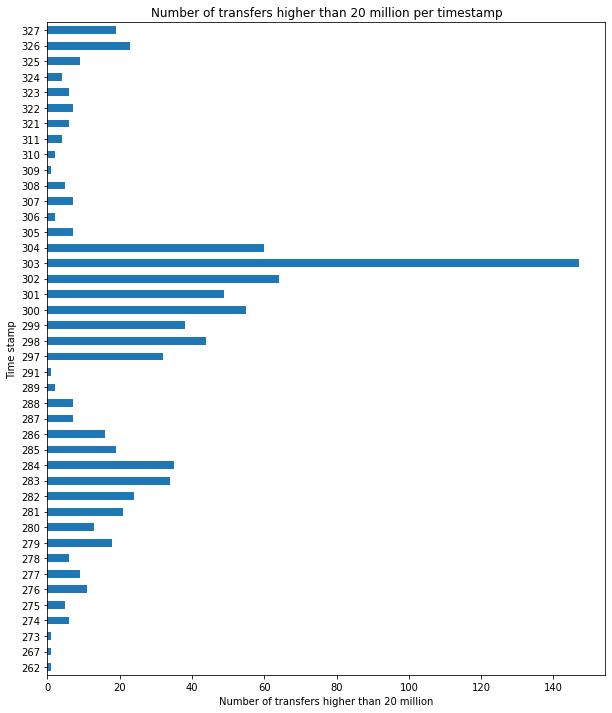

In [114]:
ax = df_maxamount['timestamp'].value_counts().sort_index().plot(kind = 'barh',figsize=(10,12),title='Number of transfers higher than 20 million per timestamp')
ax.set_xlabel("Number of transfers higher than 20 million")
ax.set_ylabel("Time stamp")

All the transfers of amounts higher than 20 million results in negative balances for the orgin account. These negative balances will be researched below in chapter 3.3. Also, all these transfers happen arround the same time stamp (between 262 and 327). 

## 3.3 Negative balances

In [96]:
df_negativebalance = df[(df['newbalanceOrig'] < 0)]
print('Number of negative orgin account balances after transfer: ', len(df_negativebalance))

Number of negative orgin accounts balances after transfer:  4536677


<AxesSubplot:title={'center':'Negative orgin accounts balances after transfer over timestamps'}, xlabel='newbalanceOrig', ylabel='timestamp'>

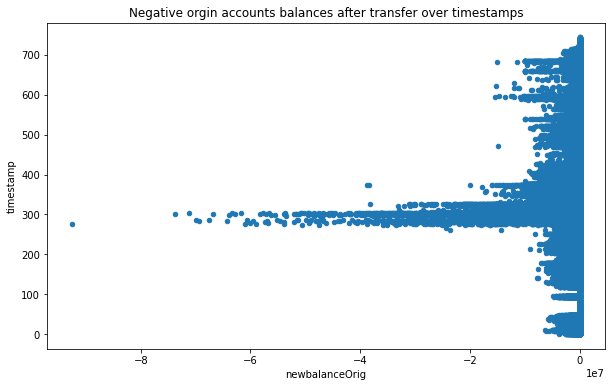

In [91]:
df_negativebalance.plot(x='newbalanceOrig', y='timestamp', kind='scatter',
        figsize=(10,6),
        title='Negative orgin account balances after transfer over timestamps')

In [95]:
df_negativebalance2 = df[(df['oldbalanceDest'] < 0)]
print('Number of negative destination account balances before transfer: ', len(df_negativebalance2))

Number of negative destination accounts balances before transfer:  927


<AxesSubplot:title={'center':'Negative destination account balances after transfer over timestamps'}, xlabel='oldbalanceDest', ylabel='timestamp'>

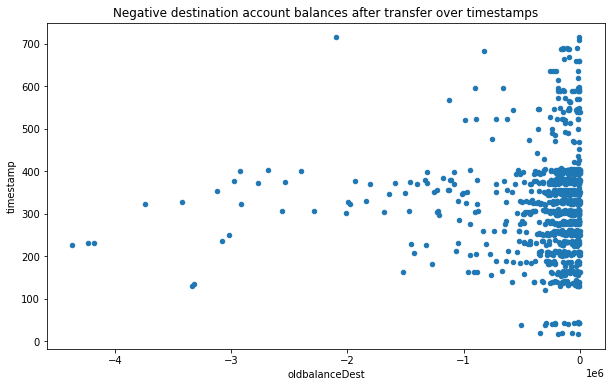

In [115]:
df_negativebalance2.plot(x='oldbalanceDest', y='timestamp', kind='scatter',
        figsize=(10,6),
        title='Negative destination account balances after transfer over timestamps')

### Discussion of results (negative balances)

# Conclusion